# John-Alexander Captsone Project

The data set that I will be exploring was compiled and made available by the Murder Accountability Project. The csv file comes from kaggle.com and markets itself as the most complete database of homicides in the United States currently available. The data set contains information regarding the age, race, sex, ethnicity of both victims and perpetrators, as well as the relationship between victims and perpetrators and the weapon used during the incident.

In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

def get_percent_difference(current, previous):
    if current == previous:
        return 100.0
    
    try:
        return (abs(current - previous)/previous) * 100.0
    except ZeroDivisionError:
        return 0
        

In [194]:
fbi = pd.read_csv('fbi_reports.csv')

# creation of a new csv file with us population data from 1980-2014
us_pop = pd.read_csv('US_Population.csv')

c:\users\johna\appdata\local\programs\python\python36-32\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [286]:
# removes all rows where the record has a victim age outside the bounds of reality
# the oldest verified person lived to the age of 122

fbi = fbi.ix[lambda df: df['Victim Age'] < 123, :]

# removes unnecessary columns from the data frame

fbi.drop(['Record Source'],inplace=True,axis=1)
fbi.drop(['Agency Code'],inplace=True,axis=1)
fbi.drop(['Agency Name'],inplace=True,axis=1)
fbi.drop(['Agency Type'],inplace=True,axis=1)

years = [x for x in range(1980, 2015)]

c:\users\johna\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\johna\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\johna\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\johna\appdata\local\programs\python\python36-32\

In [7]:
# info function provides a concise summary of a data frame
fbi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637480 entries, 0 to 638453
Data columns (total 20 columns):
Record ID                637480 non-null int64
City                     637480 non-null object
State                    637480 non-null object
Year                     637480 non-null int64
Month                    637480 non-null object
Incident                 637480 non-null int64
Crime Type               637480 non-null object
Crime Solved             637480 non-null object
Victim Sex               637480 non-null object
Victim Age               637480 non-null int64
Victim Race              637480 non-null object
Victim Ethnicity         637480 non-null object
Perpetrator Sex          637480 non-null object
Perpetrator Age          637480 non-null object
Perpetrator Race         637480 non-null object
Perpetrator Ethnicity    637480 non-null object
Relationship             637480 non-null object
Weapon                   637480 non-null object
Victim Count             6374

In [8]:
us_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
Year                 35 non-null int64
US_Population        35 non-null int64
black_population     4 non-null float64
white_population     4 non-null float64
asian_population     4 non-null float64
native_population    4 non-null float64
dtypes: float64(4), int64(2)
memory usage: 1.7 KB


In [9]:
# head function returns the first n rows, default is 5
fbi.head()

,Record ID,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count
0,1,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0
1,2,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0
2,3,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0
3,4,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0
4,5,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1


In [10]:
# removes the record id and year columns, asthey are unnecessary
# describe function generates various summary statistics

fbi.loc[:, ['Incident', 'Victim Age', 'Victim Count', 'Perpetrator Count']].describe()

,Incident,Victim Age,Victim Count,Perpetrator Count
count,637480.000000,637480.000000,637480.000000,637480.000000
mean,22.988102,33.562204,0.123303,0.185308
std,92.213585,17.792594,0.537756,0.585502
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,22.000000,0.000000,0.000000
50%,2.000000,30.000000,0.000000,0.000000
75%,10.000000,42.000000,0.000000,0.000000
max,999.000000,99.000000,10.000000,10.000000


In [195]:
# corr function computes pairwise correlation of columns

fbi.loc[:, ['Incident', 'Victim Age', 'Victim Count', 'Perpetrator Count']].corr()

,Incident,Victim Age,Victim Count,Perpetrator Count
Incident,1.000000,-0.006918,0.001781,0.001951
Victim Age,-0.006918,1.000000,-0.008047,-0.017289
Victim Count,0.001781,-0.008047,1.000000,0.067284
Perpetrator Count,0.001951,-0.017289,0.067284,1.000000


None of the numeric data columns has a strong negative or positive correlation with another.

Let's try and visualize some of this data and possible trends in a more graphical format.

# Crime Types

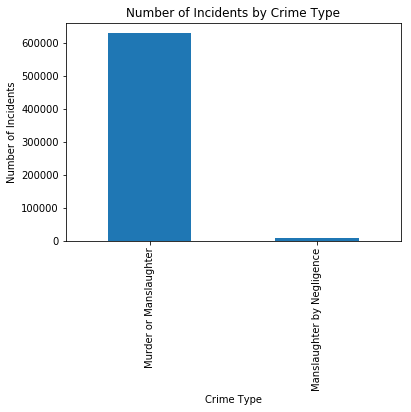

In [210]:
fbi['Crime Type'].value_counts().plot(kind='bar')

plt.title('Number of Incidents by Crime Type')
plt.xlabel('Crime Type')
plt.ylabel('Number of Incidents')

In [211]:
(628372 / (628372 + 9108)) * 100    # percentage of crimes that are Murder or Manslaughter

98.5712492940955

98.57% of all crimes in this data set fall into the 'Murder or Manslaughter' category; the crime type is heavily skewed. When dealing with incidents in this data set, it is safe to assume that most of them pertain to murder or manslaugter.

# Incidents by Year

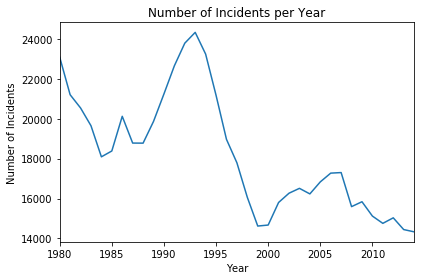

In [207]:
fbi['Year'].value_counts().sort_index(ascending=True).plot()
plt.tight_layout()
plt.title('Number of Incidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.tight_layout()

The overall number of crimes has followed a downward trend since 1980, despite an uptick in incidents in the early 1990s. However, these crime statistics are not totally useful because the total US population changes over time. Nnormalizing the data and producing crime data pertaining to the crimes per capita is a much better method of contrasting crime data over time.

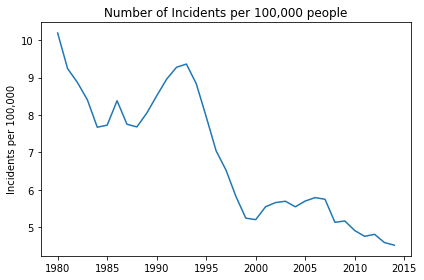

In [208]:
x = fbi.groupby('Year').count()['Incident']
y = us_pop['US_Population']

# finds the ratio of incidents per 100,000  
z = [i/j * 100000 for i,j in zip(x, y)]

plt.plot(years, z)
plt.title('Number of Incidents per 100,000 people')
plt.ylabel('Incidents per 100,000')
plt.tight_layout()

The normalized crime data certainly supports the claim that crime data has decreased fairly drastically in the 34-year span between 1980 and 2014.

# Crime Solved?

The rates at which crimes are 'solved' interests me. There is no basis for what solving a crime means, but I assume that it pertains to finding the perpetrator and the means to which a crime was carried out.

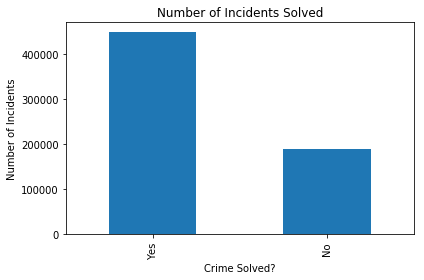

In [214]:
fbi['Crime Solved'].value_counts().plot(kind='bar')
plt.title('Number of Incidents Solved')
plt.xlabel('Crime Solved?')
plt.ylabel('Number of Incidents')
plt.tight_layout()

In [229]:
total_crimes = fbi['Crime Solved'].count()

fbi_crimes_solved_y = fbi.ix[lambda df: df['Crime Solved'] == 'Yes', :]
total_crimes_solved = fbi_crimes_solved_y['Crime Solved'].count()

total_crimes_solved / total_crimes # equals 0.70196443283306231

0.70196443283306231

About 70% of all crimes in the data set are marked as solved crimes, which is not as high as I would like it to be, but it could certainly be lower, so I'm not complaining.

Below is a graph that plots the percentage of crimes solved over time. These percentages help normalize the data over time. 

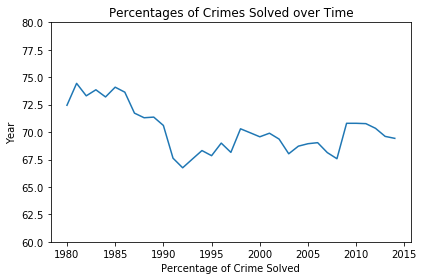

In [252]:
x = fbi_crimes_solved_y.groupby('Year').count()['Crime Solved']
y = fbi.groupby('Year').count()['Crime Solved']

z = [(i/j) * 100 for i,j in zip(x, y)]
plt.plot(years, z)
plt.title('Percentages of Crimes Solved over Time')
plt.xlabel('Percentage of Crime Solved')
plt.ylabel('Year')
plt.ylim(60, 80)
plt.tight_layout()

In [253]:
np.mean(z)

70.185158456662947

The percentage of crime solved hovers between 67.5% and 75% over the 34-year time period. The mean of the percentages is 70.18%, which falls in line with the overall data.

The graph below merely shows the number of crimes solved per every 100,000 incidents. Consider it a more zoomed in plotting of the percentage information.

(65000, 75000)

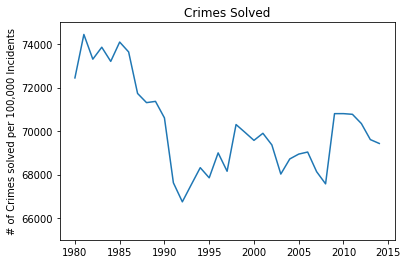

In [258]:
# crimes solved per 100,000
crimes_not_solved = fbi_crimes_solved_n.groupby('Year').count()['Crime Solved']
crimes_solved = fbi_crimes_solved_y.groupby('Year').count()['Crime Solved']

y = fbi.groupby('Year').count()['Crime Solved']

crimes_solved_per_100000 = [i/j * 100000 for i,j in zip(crimes_solved, y)]
crimes_not_solved_per_100000 = [i/j * 100000 for i,j in zip(crimes_not_solved, y)]

# plots number of crimes that were solved per 100,000 incidents

plt.plot(years, crimes_solved_per_100000)
plt.title('Crimes Solved')
plt.ylabel('# of Crimes solved per 100,000 Incidents')
plt.ylim(65000, 75000)

Below is a graph that plots both the total number of crimes solved and the total number of crimes that are unsolved. 

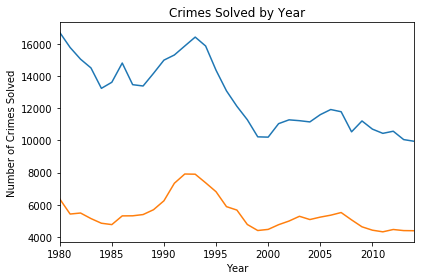

In [270]:
# plots the number of crimes solved over time
fbi_crimes_solved_y = fbi.ix[lambda df: df['Crime Solved'] == 'Yes', :]
fbi_crimes_solved_y.groupby('Year').count()['Crime Solved'].plot()

# plots the number of crimes that were NOT solved over time
fbi_crimes_solved_n = fbi.ix[lambda df: df['Crime Solved'] == 'No', :]
fbi_crimes_solved_n.groupby('Year').count()['Crime Solved'].plot()

plt.title('Crimes Solved by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes Solved')
plt.tight_layout()

The graph below plots the number of crimes solved and number of crimes that are unsolved per 100,000 people in the US over time. This data further supports the evidence that crime has seen relevant drops in the last 40 years.

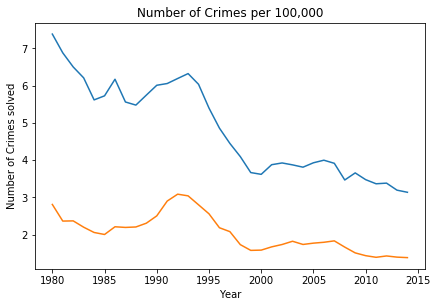

In [274]:
x = fbi_crimes_solved_y.groupby('Year').count()['Crime Solved']
y = us_pop['US_Population']

z = [(i/j) * 100000 for i,j in zip(x, y)]
plt.plot(years, z)

a = fbi_crimes_solved_n.groupby('Year').count()['Crime Solved']
b = us_pop['US_Population']

c = [(i/j) * 100000 for i,j in zip(a, b)]
plt.plot(years, c)

plt.tight_layout()
plt.title('Number of Crimes per 100,000')
plt.xlabel('Year')
plt.ylabel('Number of Crimes solved')

# Weapon Usage in Incidents

I am also very curious as to how these crimes are being committed. The data set contains information about the types of weapon being used during incidents.

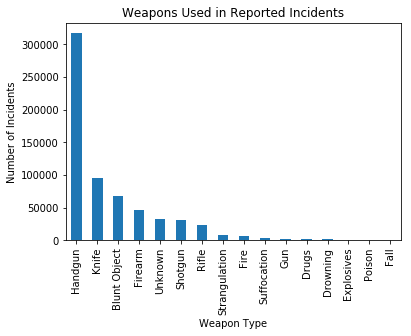

In [101]:
fbi['Weapon'].value_counts().plot(kind='bar')
plt.title('Weapons Used in Reported Incidents')
plt.xlabel('Weapon Type')
plt.ylabel('Number of Incidents')

Handguns are, by far, the weapon of choice for most perpetrators.

Below is the breakdown for handgun incidents by year.

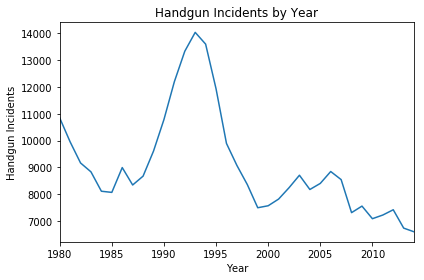

In [280]:
fbi_handgun = fbi.ix[lambda df: df['Weapon'] == 'Handgun', :]
fbi_handgun.groupby('Year').count()['Weapon'].plot()

plt.title('Handgun Incidents by Year')
plt.xlabel('Year')
plt.ylabel('Handgun Incidents')
plt.tight_layout()

Below is the breakdown for how many incidents out of 1000 involve a handgun. The mean is about 495 handgun incidents for every 1000.

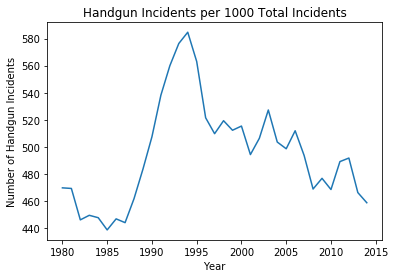

In [278]:
x = fbi_handgun.groupby('Year').count()['Weapon']
y = fbi.groupby('Year').count()['Crime Solved']

handgun_per_1000 = [i/j * 1000 for i,j in zip(x, y)]

plt.plot(years, handgun_per_1000)
plt.title('Handgun Incidents per 1000 Total Incidents')
plt.ylabel('Number of Handgun Incidents')
plt.xlabel('Year')

In [281]:
np.mean(handgun_per_1000)

494.78042043661003

Fortunately, the trend for handgun usage, alongside crime is trending downwards. This behavior is expected. If overall crime is going down and handguns are the most prevalent weapon used in crimes, the rate of crimes involving handguns should fall.

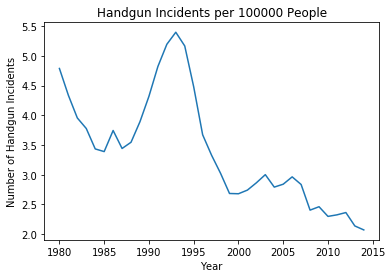

In [186]:
x = fbi_handgun.groupby('Year').count()['Weapon']
y = us_pop['US_Population']

handgun_per_100000 = [i/j * 100000 for i,j in zip(x, y)]

plt.plot(years, handgun_per_100000)
plt.title('Handgun Incidents per 100000 People')
plt.ylabel('Number of Handgun Incidents')
plt.xlabel('Year')

# FBI Reports by Location

Using the data, I want to discern where crime is the most prevalent.

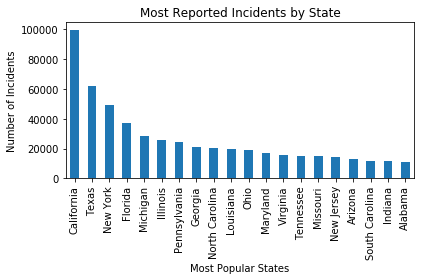

In [74]:
fbi['State'].value_counts()[:20].plot(kind='bar')
plt.title('Most Reported Incidents by State')
plt.xlabel('Most Popular States')
plt.ylabel('Number of Incidents')
plt.tight_layout()

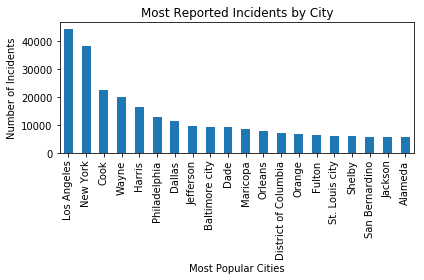

In [282]:
fbi['City'].value_counts()[:20].plot(kind='bar')
plt.title('Most Reported Incidents by City')
plt.xlabel('Most Popular Cities')
plt.ylabel('Number of Incidents')
plt.tight_layout()

The most populated cities are expected to yield more incidents. I would like to revisit this line of inquery to determine which states or cities have the highest per capita crime once I have the relevant population data.


# Incidents by Relationship

Now, I would like to determine who is committing crime and who suffers the most from these incidents.

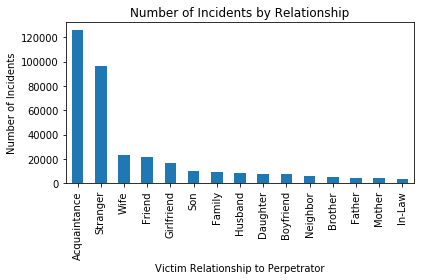

In [289]:
# removes unknown values from relationship column
fbi_rel = fbi.ix[lambda df: df['Relationship'] != 'Unknown', :]


fbi_rel['Relationship'].value_counts()[:15].plot(kind='bar')

plt.title('Number of Incidents by Relationship')
plt.xlabel('Victim Relationship to Perpetrator')
plt.ylabel('Number of Incidents')
plt.tight_layout()

In [304]:
fbi_acq = fbi.ix[lambda df: df['Relationship'] == 'Acquaintance', :].count()['Incident'] 
fbi_stranger = fbi.ix[lambda df: df['Relationship'] == 'Stranger', :].count()['Incident'] 

fbi_stranger / fbi['Incident'].count() 

#fbi_unknown = fbi.ix[lambda df: df['Relationship'] == 'Unknown', :].count()['Incident'] 
#fbi_unknown / fbi['Incident'].count()

0.15145259459120286

Acquaintances and strangers are the most prolific groups to commit crimes. These two groups generate the largest amount of incidents by a wide margin. The two combine for 35% of the reported relationships (acquaintances account for 19% and strangers count for 15% within the data). This is a very large number when 42.7% of the relationships in the data set are marked as unknown.

One should be much more wary of acquaintances and strangers when it comes to potential crimes.

# Victim Ages

Another variable that is potentially useful in determining trends amongst the victims of crimes is the age of the victim.

In [ ]:
Below is a histogram of ages found within the data.

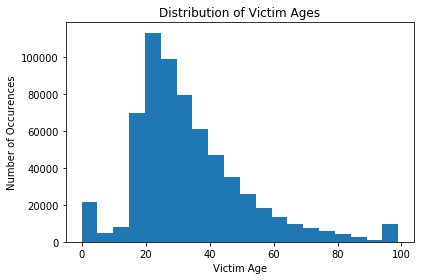

In [306]:
plt.hist(fbi['Victim Age'], bins=20)
plt.title('Distribution of Victim Ages')
plt.xlabel('Victim Age')
plt.ylabel('Number of Occurences')
plt.tight_layout()

Below is a boxplot that displays the full range of variation with an emphasis on showing the outliers, which are people around the age of 68 and above within the data set.

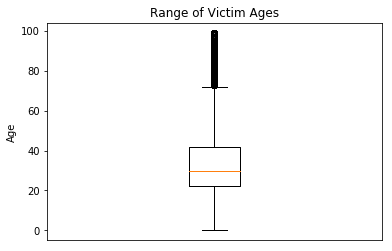

In [287]:
plt.boxplot(fbi['Victim Age'])
plt.title('Range of Victim Ages')
plt.ylabel('Age')


# remove the 1 and the tickmark from the bottom axis

plt.tick_params(
    axis='x',
    bottom='off',
    labelbottom='off'
)

In [308]:
np.median(fbi['Victim Age'])

30.0

In [310]:
np.std(fbi['Victim Age'])

17.792579941375685

The median age (denoted by the red line) is 30 years of age.

# FBI Reports Victim Groups

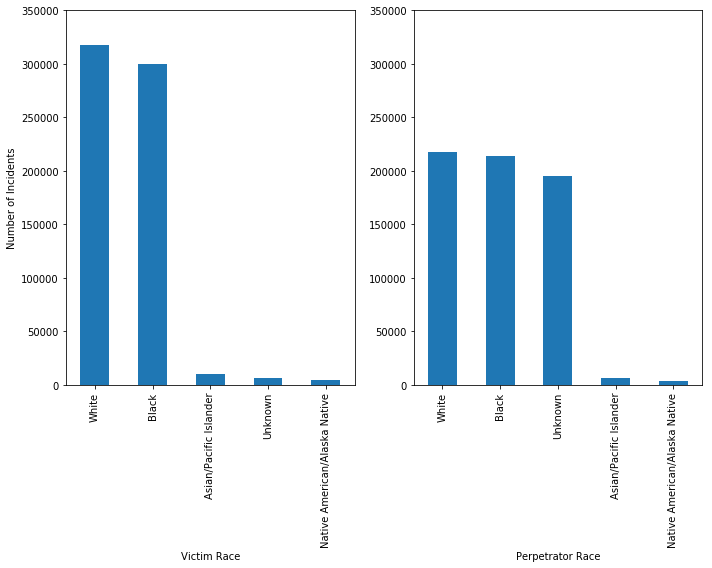

In [189]:
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
fbi['Victim Race'].value_counts().plot(kind='bar')
plt.xlabel('Victim Race')
plt.ylabel('Number of Incidents')
plt.ylim(0, 350000)

plt.subplot(1, 2, 2)
fbi['Perpetrator Race'].value_counts().plot(kind='bar')
plt.xlabel('Perpetrator Race')
plt.ylim(0, 350000)

plt.tight_layout()

Of course the majority groups are going to have the most incidents. Total population does not tell us much of the story.

I would like to normalize this data and figure out the victim and perpetrators races rates for every 100,000 people in a particular racial group.

In [22]:
# shows the distinct values for a Victim's Race
fbi['Victim Race'].value_counts()

White                            317285
Black                            299788
Asian/Pacific Islander             9888
Unknown                            5954
Native American/Alaska Native      4565
Name: Victim Race, dtype: int64

In [29]:
# shows the distinct values for a Victim's Ethnicity
fbi['Victim Ethnicity'].value_counts()

Unknown         367379
Not Hispanic    197465
Hispanic         72636
Name: Victim Ethnicity, dtype: int64

The next sections are marred by missing the data. The US Census is only taken every ten years. The dates in the fbi data set that overlap with the US Census demographic breakdowns are 1980, 1990, 2000, and 2010. Thus, these are the only four points that I am choosing to look at for this exploration.

The data points are  widely separated, so I'm forced to analyze trends over long periods of time (4 data points separated by 10 years each).

# Incidents by Victim Race 

### Incidents Concerning Black Victims

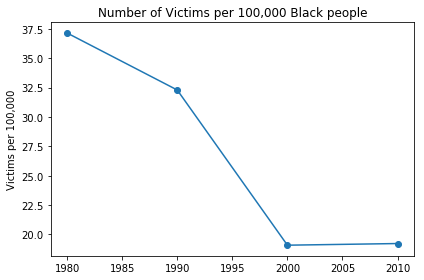

In [152]:
black_incidents = fbi[fbi['Victim Race'] == 'Black']

x = black_incidents.groupby('Year').count()['Crime Solved'].iloc[0], black_incidents.groupby('Year').count()['Crime Solved'].iloc[9], black_incidents.groupby('Year').count()['Crime Solved'].iloc[19], black_incidents.groupby('Year').count()['Crime Solved'].iloc[29]

y = us_pop['black_population'][0], us_pop['black_population'][10], us_pop['black_population'][20], us_pop['black_population'][30]

black_vic = [i/j * 100000 for i,j in zip(x, y)]
plt.plot(['1980', '1990', '2000', '2010'], black_vic, 'o-')
plt.title('Number of Victims per 100,000 Black people')
plt.ylabel('Victims per 100,000')
plt.tight_layout()

### Incidents Concerning White Victims

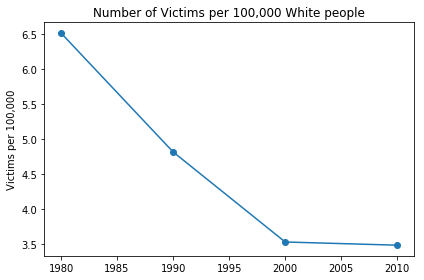

In [153]:
white_incidents = fbi[fbi['Victim Race'] == 'White']

x = white_incidents.groupby('Year').count()['Crime Solved'].iloc[0], white_incidents.groupby('Year').count()['Crime Solved'].iloc[9], white_incidents.groupby('Year').count()['Crime Solved'].iloc[19], white_incidents.groupby('Year').count()['Crime Solved'].iloc[29]

y = us_pop['white_population'][0], us_pop['white_population'][10], us_pop['white_population'][20], us_pop['white_population'][30]

white_vic = [i/j * 100000 for i,j in zip(x, y)]
plt.plot(['1980', '1990', '2000', '2010'], white_vic, 'o-')
plt.title('Number of Victims per 100,000 White people')
plt.ylabel('Victims per 100,000')
plt.tight_layout()

### Incidents Concerning Asian Victims

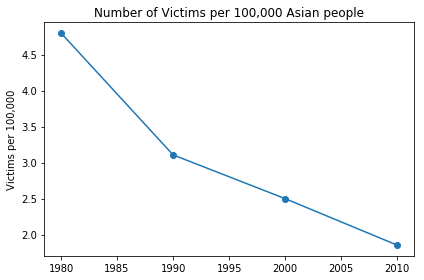

In [154]:
asian_incidents = fbi[fbi['Victim Race'] == 'Asian/Pacific Islander']

x = asian_incidents.groupby('Year').count()['Crime Solved'].iloc[0], asian_incidents.groupby('Year').count()['Crime Solved'].iloc[9], asian_incidents.groupby('Year').count()['Crime Solved'].iloc[19], asian_incidents.groupby('Year').count()['Crime Solved'].iloc[29]

y = us_pop['asian_population'][0], us_pop['asian_population'][10], us_pop['asian_population'][20], us_pop['asian_population'][30]

asian_vic = [i/j * 100000 for i,j in zip(x, y)]
plt.plot(['1980', '1990', '2000', '2010'], asian_vic, 'o-')
plt.title('Number of Victims per 100,000 Asian people')
plt.ylabel('Victims per 100,000')
plt.tight_layout()

### Incidents Concerning Native American Victims

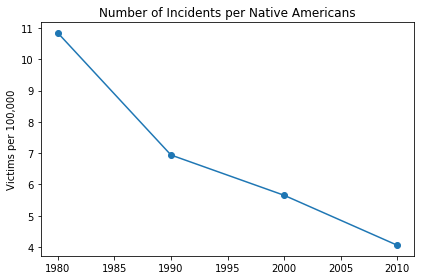

In [190]:
native_incidents = fbi[fbi['Victim Race'] == 'Native American/Alaska Native']

x = native_incidents.groupby('Year').count()['Crime Solved'].iloc[0], native_incidents.groupby('Year').count()['Crime Solved'].iloc[9], native_incidents.groupby('Year').count()['Crime Solved'].iloc[19], native_incidents.groupby('Year').count()['Crime Solved'].iloc[29]

y = us_pop['native_population'][0], us_pop['native_population'][10], us_pop['native_population'][20], us_pop['native_population'][30]

native_vic = [i/j * 100000 for i,j in zip(x, y)]
native_vic
plt.plot(['1980', '1990', '2000', '2010'], native_vic, 'o-')
plt.title('Number of Incidents per Native Americans')
plt.ylabel('Victims per 100,000')
plt.tight_layout()

In [156]:
# using a Non-parametric test as the values I am testing for are not normally distributed
# method for testing whether samples originate from the same distribution
# running a Kruskal-Wallis test as I am comparing 3+ independent groups

stats.kruskal(black_vic, white_vic, native_vic, asian_vic)

KruskalResult(statistic=11.933823529411768, pvalue=0.0076133254616832036)

In [192]:
# the p-value is .007 or 0.7%
# 5% is the normal cutoff

# p-value is a measure of the sampling error 
# p-value is a measure of statistical uncertainty
# for a low p-value, the results are ‘statistically’ significant

According to the data set, the black population has been significantly more victimized than other races during the four years plotted on the above graphs. Fortunately, the rate of victimization has decreased fairly drastically across the board. 

# Incidents by Perpetrator Race

### Incidents concerning Black perpetrators

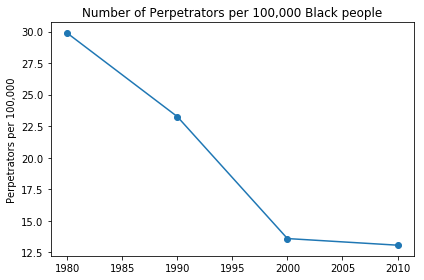

In [158]:
black_incidents = fbi[fbi['Perpetrator Race'] == 'Black']

x = black_incidents.groupby('Year').count()['Crime Solved'].iloc[0], black_incidents.groupby('Year').count()['Crime Solved'].iloc[9], black_incidents.groupby('Year').count()['Crime Solved'].iloc[19], black_incidents.groupby('Year').count()['Crime Solved'].iloc[29]

y = us_pop['black_population'][0], us_pop['black_population'][10], us_pop['black_population'][20], us_pop['black_population'][30]

black_perp = [i/j * 100000 for i,j in zip(x, y)]
plt.plot(['1980', '1990', '2000', '2010'], black_perp, 'o-')
plt.title('Number of Perpetrators per 100,000 Black people')
plt.ylabel('Perpetrators per 100,000')
plt.tight_layout()

### Incidents concerning White perpetrators

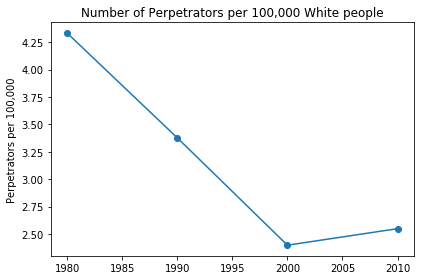

In [159]:
white_incidents = fbi[fbi['Perpetrator Race'] == 'White']

x = white_incidents.groupby('Year').count()['Crime Solved'].iloc[0], white_incidents.groupby('Year').count()['Crime Solved'].iloc[9], white_incidents.groupby('Year').count()['Crime Solved'].iloc[19], white_incidents.groupby('Year').count()['Crime Solved'].iloc[29]

y = us_pop['white_population'][0], us_pop['white_population'][10], us_pop['white_population'][20], us_pop['white_population'][30]

white_perp = [i/j * 100000 for i,j in zip(x, y)]
plt.plot(['1980', '1990', '2000', '2010'], white_perp, 'o-')
plt.title('Number of Perpetrators per 100,000 White people')
plt.ylabel('Perpetrators per 100,000')
plt.tight_layout()

### Incidents concerning Asian perpetrators

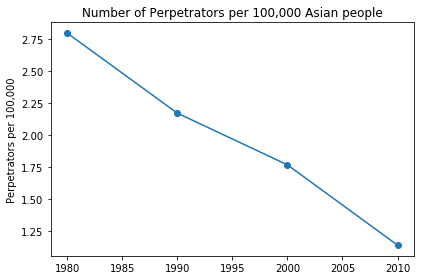

In [160]:
asian_incidents = fbi[fbi['Perpetrator Race'] == 'Asian/Pacific Islander']

x = asian_incidents.groupby('Year').count()['Crime Solved'].iloc[0], asian_incidents.groupby('Year').count()['Crime Solved'].iloc[9], asian_incidents.groupby('Year').count()['Crime Solved'].iloc[19], asian_incidents.groupby('Year').count()['Crime Solved'].iloc[29]

y = us_pop['asian_population'][0], us_pop['asian_population'][10], us_pop['asian_population'][20], us_pop['asian_population'][30]

asian_perp = [i/j * 100000 for i,j in zip(x, y)]

plt.plot(['1980', '1990', '2000', '2010'], asian_perp, 'o-')
plt.title('Number of Perpetrators per 100,000 Asian people')
plt.ylabel('Perpetrators per 100,000')
plt.tight_layout()

### Incidents concerning Native American perpetrators

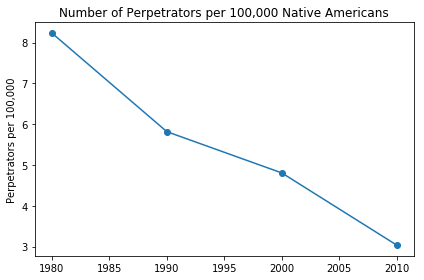

In [161]:
native_incidents = fbi[fbi['Perpetrator Race'] == 'Native American/Alaska Native']

x = native_incidents.groupby('Year').count()['Crime Solved'].iloc[0], native_incidents.groupby('Year').count()['Crime Solved'].iloc[9], native_incidents.groupby('Year').count()['Crime Solved'].iloc[19], native_incidents.groupby('Year').count()['Crime Solved'].iloc[29]

y = us_pop['native_population'][0], us_pop['native_population'][10], us_pop['native_population'][20], us_pop['native_population'][30]

native_perp = [i/j * 100000 for i,j in zip(x, y)]
plt.plot(['1980', '1990', '2000', '2010'], native_perp, 'o-')
plt.title('Number of Perpetrators per 100,000 Native Americans')
plt.ylabel('Perpetrators per 100,000')
plt.tight_layout()

In [193]:
# using a Non-parametric test as the values I am testing for are not normally distributed
# method for testing whether samples originate from the same distribution
# running a Kruskal-Wallis test as I am comparing 3+ independent groups

stats.kruskal(black_perp, white_perp, asian_perp, native_perp)

KruskalResult(statistic=12.794117647058826, pvalue=0.0051036675550819692)

According to the data set, the black population has a higher rate of perpetrators than other races. However, the perpetrator rate per 100,000 black people has dropped 82% in the 30 year time period between 1980 and 2010. This negative decline in perpetrator rates is evident in all races across the board.

# Questions for further Research

I'd like to know if there is a relationship between victim race and perpetrator race. 

I would also like to know/prove if there are specific locations that show strong correlations with weapons used.

I would also like to know/prove if there locations that show strong correlations with certain types of relationship incidents.